# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [3]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

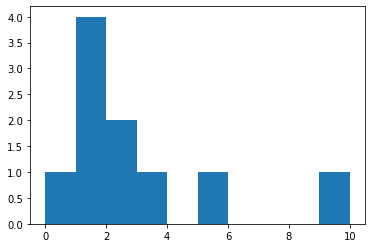

In [4]:
plt.hist(X[:,1]);

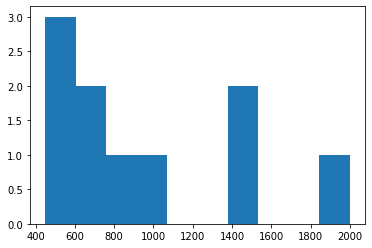

In [5]:
plt.hist(X[:,2]);

In [6]:
X1_mean = X[:, 1].mean(); 
X1_mean

2.6

In [7]:
X1_std = X[:, 1].std(); 
X1_std

2.8000000000000003

In [8]:
X_st = X.copy().astype(np.float32) 

In [9]:
X_st[:, 1] = (X_st[:, 1] -X1_mean ) /  X1_std

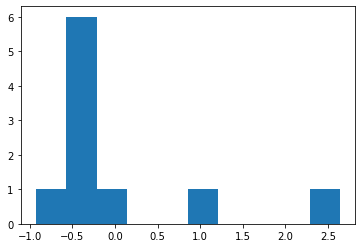

In [10]:
plt.hist(X_st[:,1]);

In [11]:
def custom_StandardScaler(x):
    return (x - x.mean()) / x.std()

In [12]:
X_st[:, 2] = custom_StandardScaler(X[:, 2])

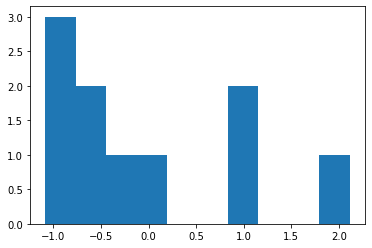

In [13]:
plt.hist(X_st[:,2]);

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [14]:
X[:, 1].min() , X[:, 1].max()

(0, 10)

In [15]:
X[:, 2].min() , X[:, 2].max()

(450, 2000)

In [16]:
X_norm = X.copy().astype(np.float32)

In [17]:
X_norm[:, 1] = (X_norm[:, 1] - X_norm[:, 1].min()) / (X_norm[:, 1].max() - X_norm[:, 1].min())

In [18]:
X_norm[:, 1].min() , X_norm[:, 1].max()

(0.0, 1.0)

In [19]:
def custom_MinMaxScaler(x):
    return (x - x.min()) / (x.max() - x.min())

In [20]:
X_norm[:, 2] = custom_MinMaxScaler(X[:, 2])
X_norm[:, 3] = custom_MinMaxScaler(X[:, 3])

In [21]:
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354838, 0.5       ],
       [1.        , 0.1       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.6451613 , 0.5       ],
       [1.        , 0.        , 0.22580644, 0.        ],
       [1.        , 0.5       , 0.67741936, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.3548387 , 0.5       ]], dtype=float32)

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [22]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

In [23]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred-y), X))
        if i % (iterations/10) == 0:
            print(f'# итерация {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация 100, MSE: 83.07084064242365, веса: [15.80981767 -1.47071919 -4.02104402 23.77743823]
# итерация 200, MSE: 77.57314443011362, веса: [17.73210857 -0.75197513 -4.4895144  22.82135258]
# итерация 300, MSE: 73.15826073291859, веса: [19.413175    0.05656311 -4.61383302 21.86696314]
# итерация 400, MSE: 69.37371406700665, веса: [20.99088085  0.7478195  -4.64820294 20.96716358]
# итерация 500, MSE: 66.09659628007955, веса: [22.47624497  1.33613467 -4.61751671 20.11954789]
# итерация 600, MSE: 63.23578306655097, веса: [23.87589339  1.83870782 -4.5366839  19.32053315]
# итерация 700, MSE: 60.72226747605892, веса: [25.19570432  2.26986859 -4.41762339 18.56683984]
# итерация 800, MSE: 58.502721250303885, веса: [26.44099846  2.64143679 -4.26995915 17.8554898 ]
# итерация 900, MSE: 56.53507796944638, веса: [27.61661524  2.96316509 -4.10144413 17.18376819]
# итерация 1000, MSE: 54.78548613469608, веса: [28.72697428  3.24310672 -3.91830342 16.54919059]


array([28.72697428,  3.24310672, -3.91830342, 16.54919059])

In [25]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-2):
    np.random.seed(2020)
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    W = np.random.randn(X.shape[1])
    
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= alpha * (1/n * 2 * np.dot((y_pred_tmp-y_tmp), X_tmp))
        if i % (iterations/10) == 0:
            print(f'# итерация {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация 500, MSE: 21.43872189588106, веса: [22.47726515  1.35089175 -4.62040918 20.10393633]
# итерация 1000, MSE: 17.51240169913853, веса: [28.73047447  3.25597872 -3.92297231 16.53258104]
# итерация 1500, MSE: 18.69218100717422, веса: [33.43596412  4.22368909 -2.92962472 13.84283032]
# итерация 2000, MSE: 21.387809104774284, веса: [37.00271178  4.78155637 -2.00000538 11.80312671]
# итерация 2500, MSE: 24.324169253177327, веса: [39.71606386  5.14019462 -1.22668137 10.25112197]
# итерация 3000, MSE: 27.02898463773807, веса: [41.78386371  5.38898327 -0.61267961  9.06824244]
# итерация 3500, MSE: 29.34858767536857, веса: [43.36106278  5.5696145  -0.13517132  8.16596406]
# итерация 4000, MSE: 31.26288887991845, веса: [44.56456743  5.70405131  0.23261432  7.47745042]
# итерация 4500, MSE: 32.80624289871318, веса: [45.483108    5.80539344  0.5145864   6.9519557 ]
# итерация 5000, MSE: 34.03163882486375, веса: [46.1842281   5.88227817  0.73028731  6.55084433]


array([46.1842281 ,  5.88227817,  0.73028731,  6.55084433])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [27]:
def eval_model_ref2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred-y), X) + lambda_ * W)
        if i % (iterations/10) == 0:
            print(f'# итерация {i}, MSE: {err}, веса: {W}')
    return W

In [28]:
eval_model_ref2(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-2)

# итерация 100, MSE: 83.13035587596781, веса: [15.78848328 -1.46363612 -3.99603389 23.74727094]
# итерация 200, MSE: 77.6380222256227, веса: [17.69310405 -0.75835805 -4.45131933 22.79942103]
# итерация 300, MSE: 73.2990466573356, веса: [19.34272557  0.02850994 -4.56668303 21.86282726]
# итерация 400, MSE: 69.60850885511044, веса: [20.8756374   0.69474502 -4.59466794 20.98854194]
# итерация 500, MSE: 66.43515814800894, веса: [22.3045563   1.25628566 -4.56072012 20.17311004]
# итерация 600, MSE: 63.683035479033265, веса: [23.63768921  1.73136091 -4.48010675 19.41204531]
# итерация 700, MSE: 61.27969660820215, веса: [24.88232678  2.1350094  -4.36486684 18.70126299]
# итерация 800, MSE: 59.169276408134216, веса: [26.04505189  2.47952725 -4.22457463 18.03706449]
# итерация 900, MSE: 57.30780289156544, веса: [27.13183369  2.77497359 -4.06681837 17.41608948]
# итерация 1000, MSE: 55.65998931356627, веса: [28.14810422  3.02958545 -3.89758462 16.83527449]


array([28.14810422,  3.02958545, -3.89758462, 16.83527449])

# Домашнее задание:  

# 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [29]:
lamb = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])
lamb

array([1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08])

In [30]:
def eval_model_ref2dz(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred-y), X) + lambda_ * W)
    return W

In [31]:
W1 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-2)
W2 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-3)
W3 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-4)
W4 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-5)
W5 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-6)
W6 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-7)
W7 = eval_model_ref2dz(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-8)

In [32]:
W = np.array([W1, W2, W3, W4, W5, W6, W7])
W

array([[28.14810422,  3.02958545, -3.89758462, 16.83527449],
       [28.66761418,  3.22116266, -3.91623976, 16.57863297],
       [28.72102321,  3.24090626, -3.91809714, 16.55214336],
       [28.72637902,  3.24288661, -3.9182828 , 16.54948596],
       [28.72691475,  3.24308471, -3.91830136, 16.54922013],
       [28.72696832,  3.24310452, -3.91830322, 16.54919355],
       [28.72697368,  3.2431065 , -3.9183034 , 16.54919089]])

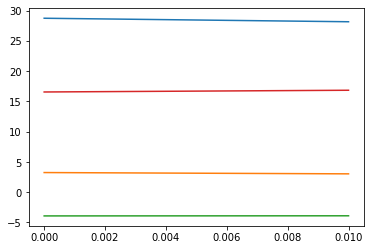

In [33]:
plt.plot(lamb, W)

# Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

В разных ситуациях целесообразно применять различные метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение. В общем случае, когда выбор метода неочевиден, полезной практикой считается создавать масштабированные копии набора данных, с которыми работает специалист, и сравнивать друг с другом полученные после применения модели результаты для выявления оптимального метода масштабирования для имеющейся ситуации.

# Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *

In [34]:
def eval_model_ref1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(2020)
    n = X.shape[0]
    W = np.random.randn(X.shape[1])
    
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred-y), X) + lambda_ * abs(W))
        if i % (iterations/10) == 0:
            print(f'# итерация {i}, MSE: {err}, веса: {W}')
    return W

In [35]:
eval_model_ref1(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-8)

# итерация 100, MSE: 83.07084067727506, веса: [15.80981764 -1.47071919 -4.02104402 23.7774382 ]
# итерация 200, MSE: 77.57314450548992, веса: [17.73210851 -0.75197512 -4.48951442 22.82135257]
# итерация 300, MSE: 73.15826089712492, веса: [19.4131749   0.05656313 -4.61383307 21.86696316]
# итерация 400, MSE: 69.37371434332115, веса: [20.99088069  0.74781952 -4.64820301 20.96716364]
# итерация 500, MSE: 66.09659668425357, веса: [22.47624473  1.33613469 -4.61751681 20.11954799]
# итерация 600, MSE: 63.235783605148825, веса: [23.87589308  1.83870783 -4.53668402 19.32053329]
# итерация 700, MSE: 60.72226814940657, веса: [25.19570392  2.26986858 -4.41762353 18.56684003]
# итерация 800, MSE: 58.50272205450837, веса: [26.44099797  2.64143677 -4.26995931 17.85549004]
# итерация 900, MSE: 56.53507889780025, веса: [27.61661464  2.96316505 -4.10144431 17.18376849]
# итерация 1000, MSE: 54.785487178665036, веса: [28.72697357  3.24310665 -3.91830363 16.54919096]


array([28.72697357,  3.24310665, -3.91830363, 16.54919096])